# Predictive Modeling

Building models to predict restaurant grades (A, B, or C).

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../data/inspections_clean.csv')
print(df.shape)
df.head()

(51839, 14)


,CAMIS,INSPECTION_DATE,RESTAURANT_NAME,BORO,ZIPCODE,CUISINE,SCORE,GRADE,TOTAL_VIOLATIONS,CRITICAL_VIOLATIONS,YEAR,MONTH,DAY_OF_WEEK,QUARTER
0,30075445,2023-08-22,MORRIS PARK BAKE SHOP,Bronx,10462.0,Bakery Products/Desserts,12.0,A,3,1,2023,8,1,3
1,30075445,2024-11-08,MORRIS PARK BAKE SHOP,Bronx,10462.0,Bakery Products/Desserts,10.0,A,3,1,2024,11,4,4
2,30191841,2023-04-23,D.J. REYNOLDS,Manhattan,10019.0,Irish,10.0,A,2,2,2023,4,6,2
3,30191841,2025-02-20,D.J. REYNOLDS,Manhattan,10019.0,Irish,10.0,A,2,2,2025,2,3,1
4,40356018,2024-04-16,RIVIERA CATERERS,Brooklyn,11224.0,American,0.0,A,0,0,2024,4,1,2


In [3]:
# Check class balance
print("Grade distribution:")
print(df['GRADE'].value_counts())
print(f"\nPercentages:")
print(df['GRADE'].value_counts(normalize=True))

Grade distribution:
GRADE
A    45013
B     4475
C     2351
Name: count, dtype: int64

Percentages:
GRADE
A    0.868323
B    0.086325
C    0.045352
Name: proportion, dtype: float64


In [4]:
# Encode categorical features
le_cuisine = LabelEncoder()
le_boro = LabelEncoder()

df['CUISINE_ENCODED'] = le_cuisine.fit_transform(df['CUISINE'].fillna('Unknown'))
df['BORO_ENCODED'] = le_boro.fit_transform(df['BORO'].fillna('Unknown'))

# Select features
feature_cols = [
    'TOTAL_VIOLATIONS', 
    'CRITICAL_VIOLATIONS', 
    'MONTH', 
    'DAY_OF_WEEK',
    'CUISINE_ENCODED', 
    'BORO_ENCODED'
]

X = df[feature_cols]
y = df['GRADE']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (51839, 6)
Target: (51839,)


In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print(f"\nTrain grade distribution:")
print(y_train.value_counts())

Training set: (41471, 6)
Test set: (10368, 6)

Train grade distribution:
GRADE
A    36010
B     3580
C     1881
Name: count, dtype: int64


In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model 1: Logistic Regression

In [7]:
# Train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9375

Classification Report:
              precision    recall  f1-score   support

           A       0.95      1.00      0.97      9003
           B       0.76      0.57      0.65       895
           C       0.84      0.51      0.64       470

    accuracy                           0.94     10368
   macro avg       0.85      0.69      0.75     10368
weighted avg       0.93      0.94      0.93     10368



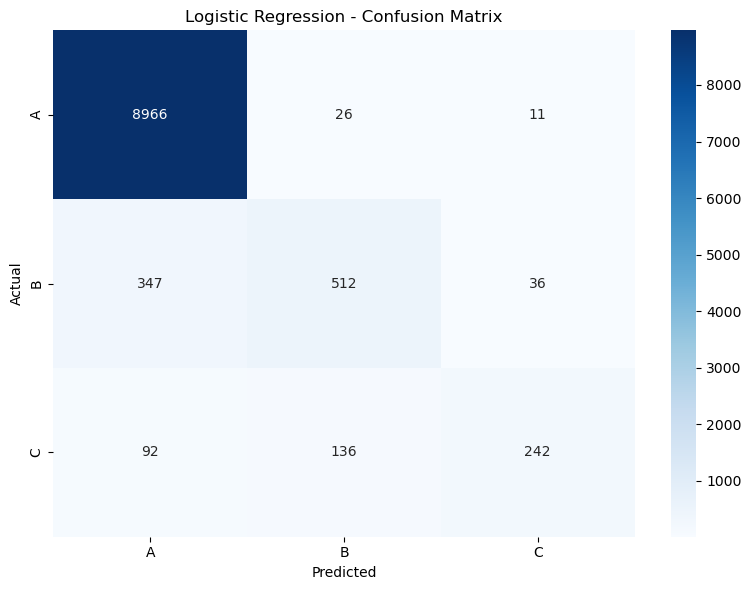

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr, labels=['A', 'B', 'C'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['A', 'B', 'C'], 
            yticklabels=['A', 'B', 'C'])
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

## Model 2: Random Forest

In [9]:
# Train
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9381

Classification Report:
              precision    recall  f1-score   support

           A       0.96      0.99      0.98      9003
           B       0.72      0.64      0.68       895
           C       0.75      0.59      0.66       470

    accuracy                           0.94     10368
   macro avg       0.81      0.74      0.77     10368
weighted avg       0.93      0.94      0.94     10368



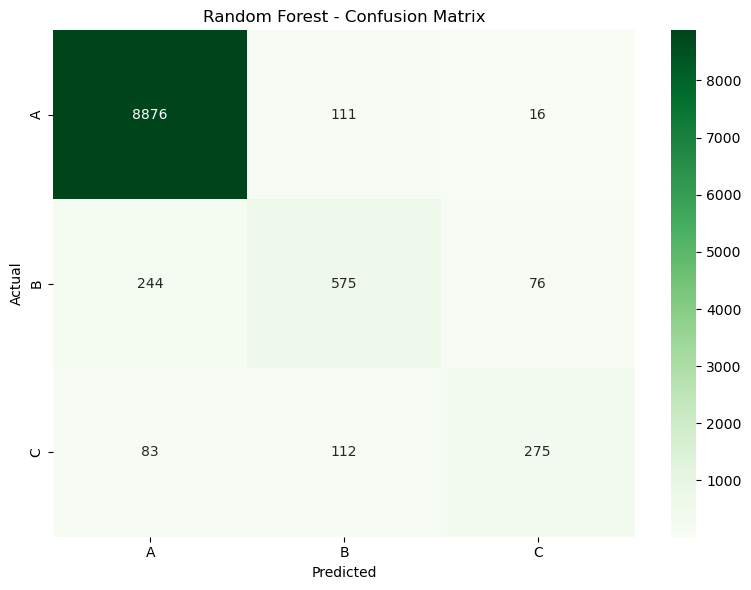

In [10]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['A', 'B', 'C'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['A', 'B', 'C'],
            yticklabels=['A', 'B', 'C'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

               feature  importance
1  CRITICAL_VIOLATIONS    0.443547
0     TOTAL_VIOLATIONS    0.304740
4      CUISINE_ENCODED    0.099426
2                MONTH    0.065899
3          DAY_OF_WEEK    0.047702
5         BORO_ENCODED    0.038686


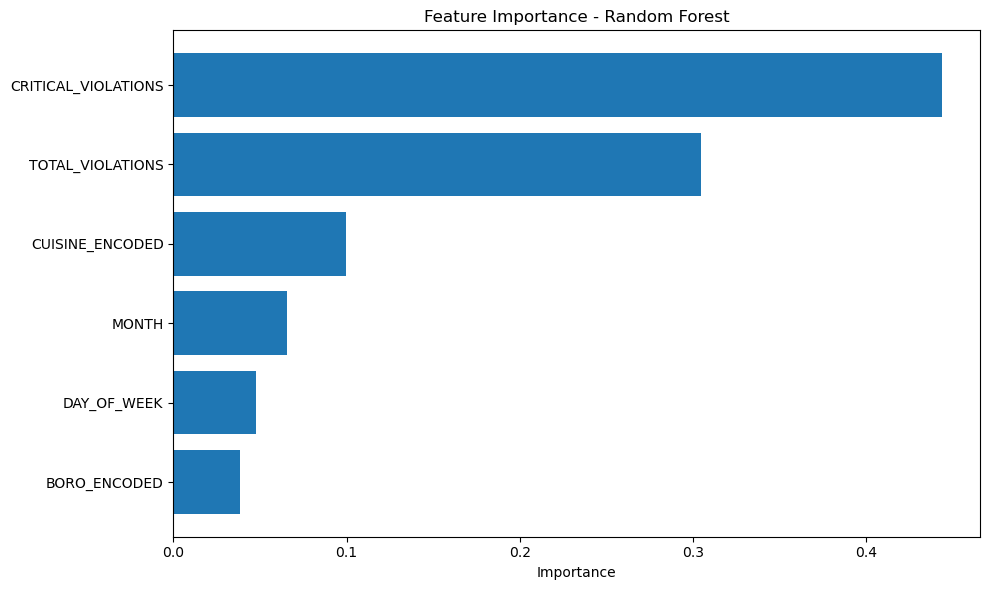

In [11]:
# Feature importance
importances = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(importances)

plt.figure(figsize=(10, 6))
plt.barh(importances['feature'], importances['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Comparison

                 Model  Accuracy
0  Logistic Regression  0.937500
1        Random Forest  0.938079


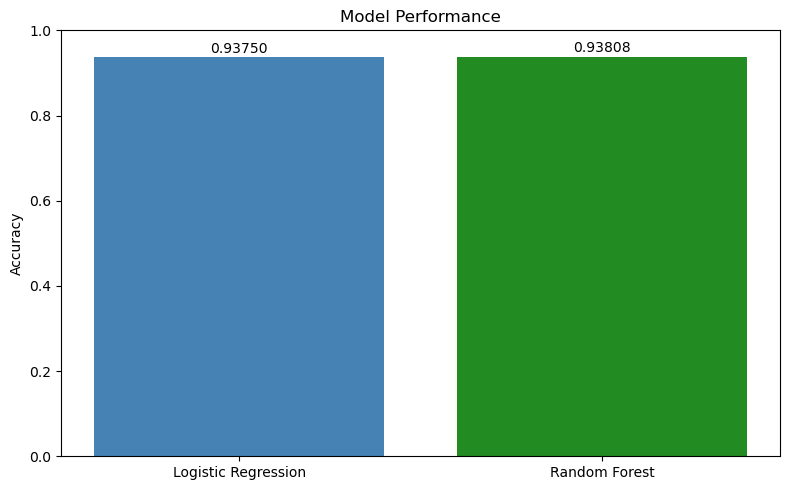

In [14]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print(results)

plt.figure(figsize=(8, 5))
plt.bar(results['Model'], results['Accuracy'], color=['steelblue', 'forestgreen'])
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.ylim(0, 1)
for i, v in enumerate(results['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.5f}', ha='center')
plt.tight_layout()
plt.show()